In [2]:
from typing import Dict,TypedDict
from langgraph.graph import StateGraph

In [4]:
class Agent(TypedDict):
    name: str
    age: str 
    skills: str
    result : str

In [11]:
def node1(state:Agent)->Agent:
    state['result']=f"hi {state['name']}"
    return state

def node2(state:Agent)->Agent:
    state['result']+=f", age = {state['age']}"
    return state

def node3(state:Agent)->Agent:
    state['result']+=f", skills = {state['skills']}"
    return state

In [12]:
graph=StateGraph(Agent)
graph.add_node("1",node1)
graph.add_node("2",node2)
graph.add_node("3",node3)

graph.set_entry_point('1')
graph.add_edge('1','2')
graph.add_edge('2','3')
graph.set_finish_point('3')

app=graph.compile()


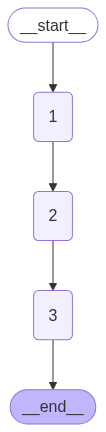

In [13]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [14]:
res=app.invoke({'name':'bob','age':'21',"skills":"none"})
print(res)

{'name': 'bob', 'age': '21', 'skills': 'none', 'result': 'hi bob, age = 21, skills = none'}
